<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM_Predict/blob/main/Challenge_predict_evasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> CHALLENGE TELECOM X:
**An√°lisis de evasi√≥n de clientes Parte-2**

## **MISI√ìN**



Tu nueva misi√≥n es desarrollar modelos predictivos capaces de prever qu√© clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelaci√≥n, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **OBJETIVOS DEL DESAF√çO**



- Preparar los datos para el modelado (tratamiento, codificaci√≥n, normalizaci√≥n).

- Realizar an√°lisis de correlaci√≥n y selecci√≥n de variables.

- Entrenar dos o m√°s modelos de clasificaci√≥n.

- Evaluar el rendimiento de los modelos con m√©tricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusi√≥n estrat√©gica se√±alando los principales factores que influyen en la cancelaci√≥n.

## **DESARROLLO**

### **Verificar versiones de bibliotecas**

In [3]:
import pandas, numpy, matplotlib, seaborn, sklearn, scipy #scipy
print('Versi√≥n de Pandas: %s' % pandas.__version__)
print('Versi√≥n de Numpy: %s' % numpy.__version__)
print('Versi√≥n de Matplotlib: %s' % matplotlib.__version__)
print('Versi√≥n de Seaborn: %s' % seaborn.__version__)
print('Versi√≥n de Sklearn: %s' % sklearn.__version__)
print('Versi√≥n de Scipy: %s' % scipy.__version__)

Versi√≥n de Pandas: 2.2.2
Versi√≥n de Numpy: 2.0.2
Versi√≥n de Matplotlib: 3.10.0
Versi√≥n de Seaborn: 0.13.2
Versi√≥n de Sklearn: 1.6.1
Versi√≥n de Scipy: 1.16.1


### **Cargar archivo**

In [4]:
import pandas as pd

# Cargar archivo CSV
df_final = pd.read_csv("/content/df_predict_churn_2.csv")

# Vista r√°pida de los primeros registros
df_final.head(5)

ID_Cliente Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.StreamingTV internet.StreamingMovies  \
0                      DSL  ...                  Yes                       No   
1                      DSL  ...                   No                      Yes   
2             Fibra √ìptica  ...                   No                       No   
3             Fibra √ìptica  ...                  Yes                      Yes   
4             Fibra √ìptica  ...                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  Facturacion_Mensual account.Charges.Total Cuentas_Diarias Churn_bin  \
0                65.6                593.30        2.186667       0.0   
1                59.9                542.40        1.996667       0.0   
2                73.9                280.85        2.463333       1.0   
3                98.0               1237.85        3.266667       1.0   
4                83.9                267.40        2.796667       1.0   

   Churn_num  
0        0.0  
1        0.0  
2        1.0  
3        1.0  
4        1.0  

[5 rows x 24 columns]

In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

En este caso, como el objetivo es predecir si un cliente va a cancelar o no el servicio, estamos trabajando con una variable categ√≥rica (churn: s√≠ o no). Por eso, los modelos adecuados son los de clasificaci√≥n, como DecisionTreeClassifier o KNeighborsClassifier

In [6]:
df_final.sample(5)

ID_Cliente Churn customer.gender  customer.SeniorCitizen  \
6487  8914-RBTSB   Yes            Male                       0   
5902  8064-RAVOH    No            Male                       0   
2189  3066-RRJIO   Yes          Female                       0   
773   1095-WGNGG    No          Female                       0   
4148  5687-DKDTV   Yes          Female                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
6487              Yes                  No               31                Yes   
5902               No                 Yes                1                Yes   
2189               No                  No                1                Yes   
773               Yes                  No               61                Yes   
4148               No                  No                4                Yes   

     phone.MultipleLines internet.InternetService  ... internet.StreamingTV  \
6487                 Yes             Fibra √ìptica  ...                  Yes   
5902                  No                      DSL  ...                   No   
2189                  No             Fibra √ìptica  ...                   No   
773                  Yes             Fibra √ìptica  ...                  Yes   
4148                  No             Sin Servicio  ...  No internet service   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
6487                       No   Month-to-month                       No   
5902                       No   Month-to-month                      Yes   
2189                       No   Month-to-month                      Yes   
773                       Yes         Two year                      Yes   
4148      No internet service   Month-to-month                       No   

          account.PaymentMethod Facturacion_Mensual account.Charges.Total  \
6487           Electronic check               93.80               3019.50   
5902           Electronic check               49.85                 49.85   
2189               Mailed check               69.95                 69.95   
773   Bank transfer (automatic)              101.05               5971.25   
4148               Mailed check               20.35                 77.50   

     Cuentas_Diarias Churn_bin  Churn_num  
6487        3.126667       1.0        1.0  
5902        1.661667       0.0        0.0  
2189        2.331667       1.0        1.0  
773         3.368333       0.0        0.0  
4148        0.678333       1.0        1.0  

[5 rows x 24 columns]

### <font color='blue'>**1.- Preparar los datos para el modelado (tratamiento, codificaci√≥n, normalizaci√≥n)**.

##### **Tratamiento de valores nulos**

In [7]:
# Imputar con mediana en 'account.Charges.Total' ‚Äî versi√≥n segura
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(df_final['account.Charges.Total'].median())

# Eliminar filas sin datos en la variable objetivo
df_final.dropna(subset=['Churn_bin', 'Churn_num'], inplace=True)

##### **Codificaci√≥n de Variables Categ√≥rica**

In [8]:
# Eliminar columna de ID si no es predictiva
df_final.drop(columns=['ID_Cliente'], inplace=True)

# Codificaci√≥n con pd.get_dummies
columnas_categoricas = df_final.select_dtypes(include='object').columns

df_final = pd.get_dummies(df_final, columns=columnas_categoricas, drop_first=True)

##### **Verificaci√≥n final del DataFram**

In [9]:
# Confirmar que no quedan datos nulos ni columnas tipo object
print(df_final.isnull().sum())
print(df_final.dtypes)

customer.SeniorCitizen                           0
customer.tenure                                  0
Facturacion_Mensual                              0
account.Charges.Total                            0
Cuentas_Diarias                                  0
Churn_bin                                        0
Churn_num                                        0
Churn_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fibra √ìptica            0
internet.InternetService_Sin Servicio            0
internet.OnlineSecurity_No internet service      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_No internet service        0
internet.OnlineBackup_Yes     

### <font color='blue'>**2.- Realizar an√°lisis de correlaci√≥n y selecci√≥n de variables**.

##### **An√°lisis de correlaci√≥n num√©rica**

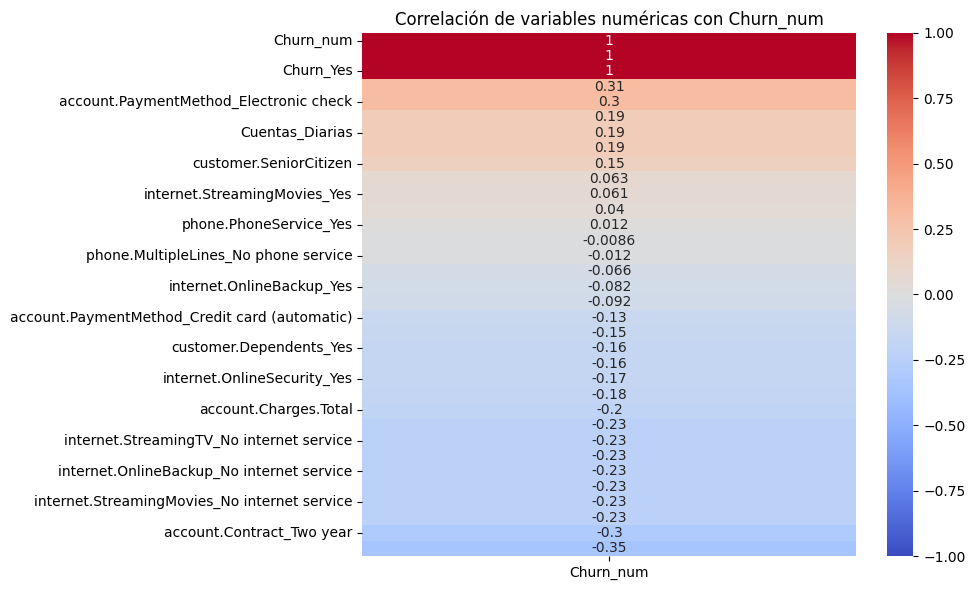

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlaci√≥n de variables num√©ricas
correlaciones = df_final.corr(numeric_only=True)

# Visualizar correlaci√≥n con la variable objetivo
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones[['Churn_num']].sort_values(by='Churn_num', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlaci√≥n de variables num√©ricas con Churn_num")
plt.tight_layout()
plt.show()

##### **An√°lisis de Importancia para Variables Booleana**

/tmp/ipython-input-1220061550.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


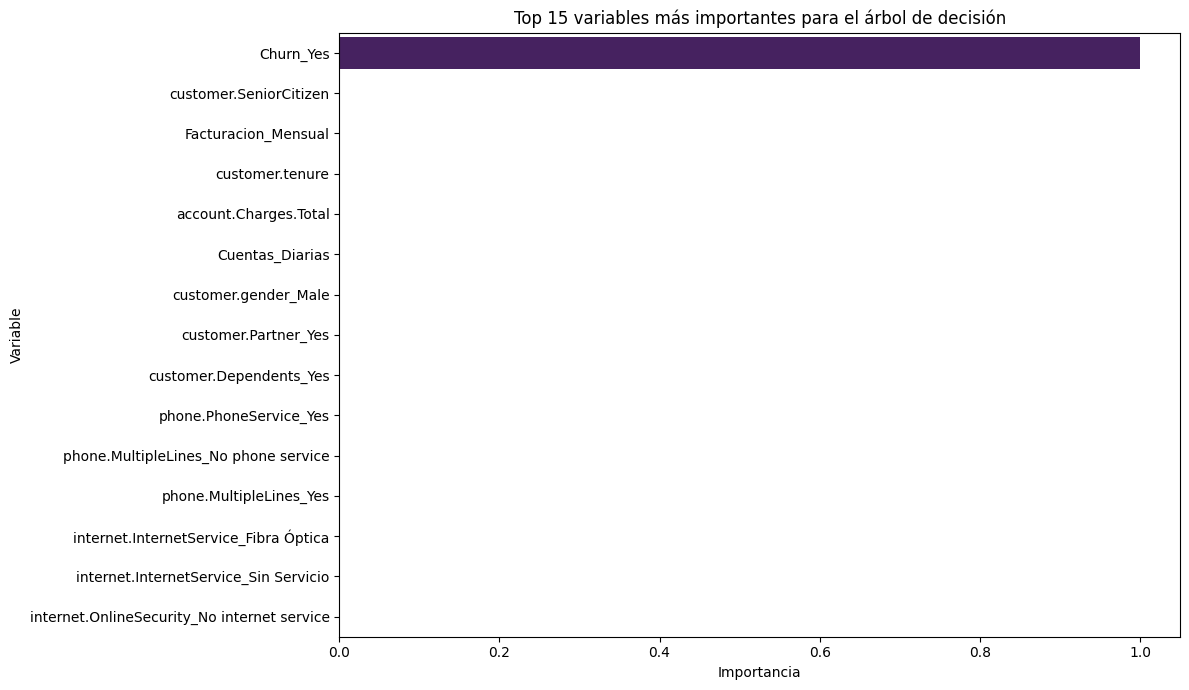

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Definimos variables predictoras y target
X = df_final.drop(columns=['Churn_bin', 'Churn_num'])
y = df_final['Churn_bin']  # o 'Churn_num' si preferimos continuo

# Entrenar modelo r√°pido para evaluar importancia
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

# Obtener importancias
importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualizaci√≥n
plt.figure(figsize=(12, 7))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables m√°s importantes para el √°rbol de decisi√≥n")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

/tmp/ipython-input-943410578.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


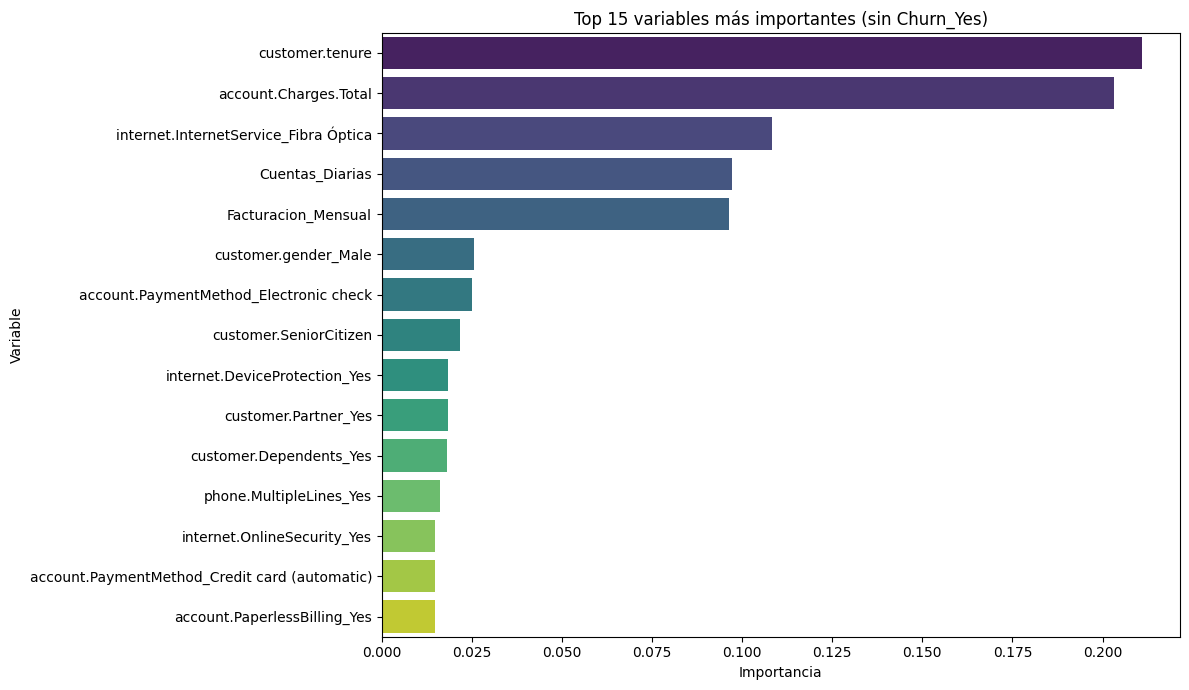

In [12]:
X = df_final.drop(columns=['Churn_bin', 'Churn_num', 'Churn_Yes'])  # excluimos el target y su duplicado
y = df_final['Churn_bin']  # o 'Churn_num' seg√∫n tu criterio

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualizamos nuevamente
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables m√°s importantes (sin Churn_Yes)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Variables Predictivas Seleccionadas para el Modelo **DecisionTreeClassifier**

| Variable                                  | Descripci√≥n y Justificaci√≥n |
|--------------------------------------------|------------------------------|
| `customer.tenure`                          | Antig√ºedad del cliente; menor permanencia se asocia a mayor churn. |
| `account.Charges.Total`                    | Total facturado; refleja exposici√≥n financiera acumulada. |
| `internet.InternetService_Fibra √ìptica`    | Este tipo de servicio est√° correlacionado con mayor abandono. |
| `Cuentas_Diarias`                          | Actividad operativa diaria; puede influir en la permanencia. |
| `Facturacion_Mensual`                      | Costo mensual del servicio; niveles altos pueden generar abandono. |
| `customer.SeniorCitizen`                   | Grupo demogr√°fico con patrones de churn distintos. |
| `account.PaymentMethod_Electronic check`   | M√©todo de pago vinculado a mayor volatilidad de permanencia. |
| `account.Contract_Two year`                | Contrato largo suele estar ligado a menor churn. |
| `internet.OnlineSecurity_Yes`              | Servicios adicionales pueden aumentar la percepci√≥n de valor. |
| `phone.MultipleLines_Yes`                  | Presencia de l√≠neas m√∫ltiples podr√≠a asociarse a mayor complejidad o costos. |

##### **An√°lisis de Multicolinealidad con VIF**

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Usamos df_final directamente con las variables seleccionadas
X = df_final[['customer.tenure', 'account.Charges.Total', 'Cuentas_Diarias', 'Facturacion_Mensual']]
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)

                Variable       VIF
0        customer.tenure  5.769597
1  account.Charges.Total  9.395018
2        Cuentas_Diarias       inf
3    Facturacion_Mensual       inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


##### **Visualizaci√≥n de correlaciones cruzadas**

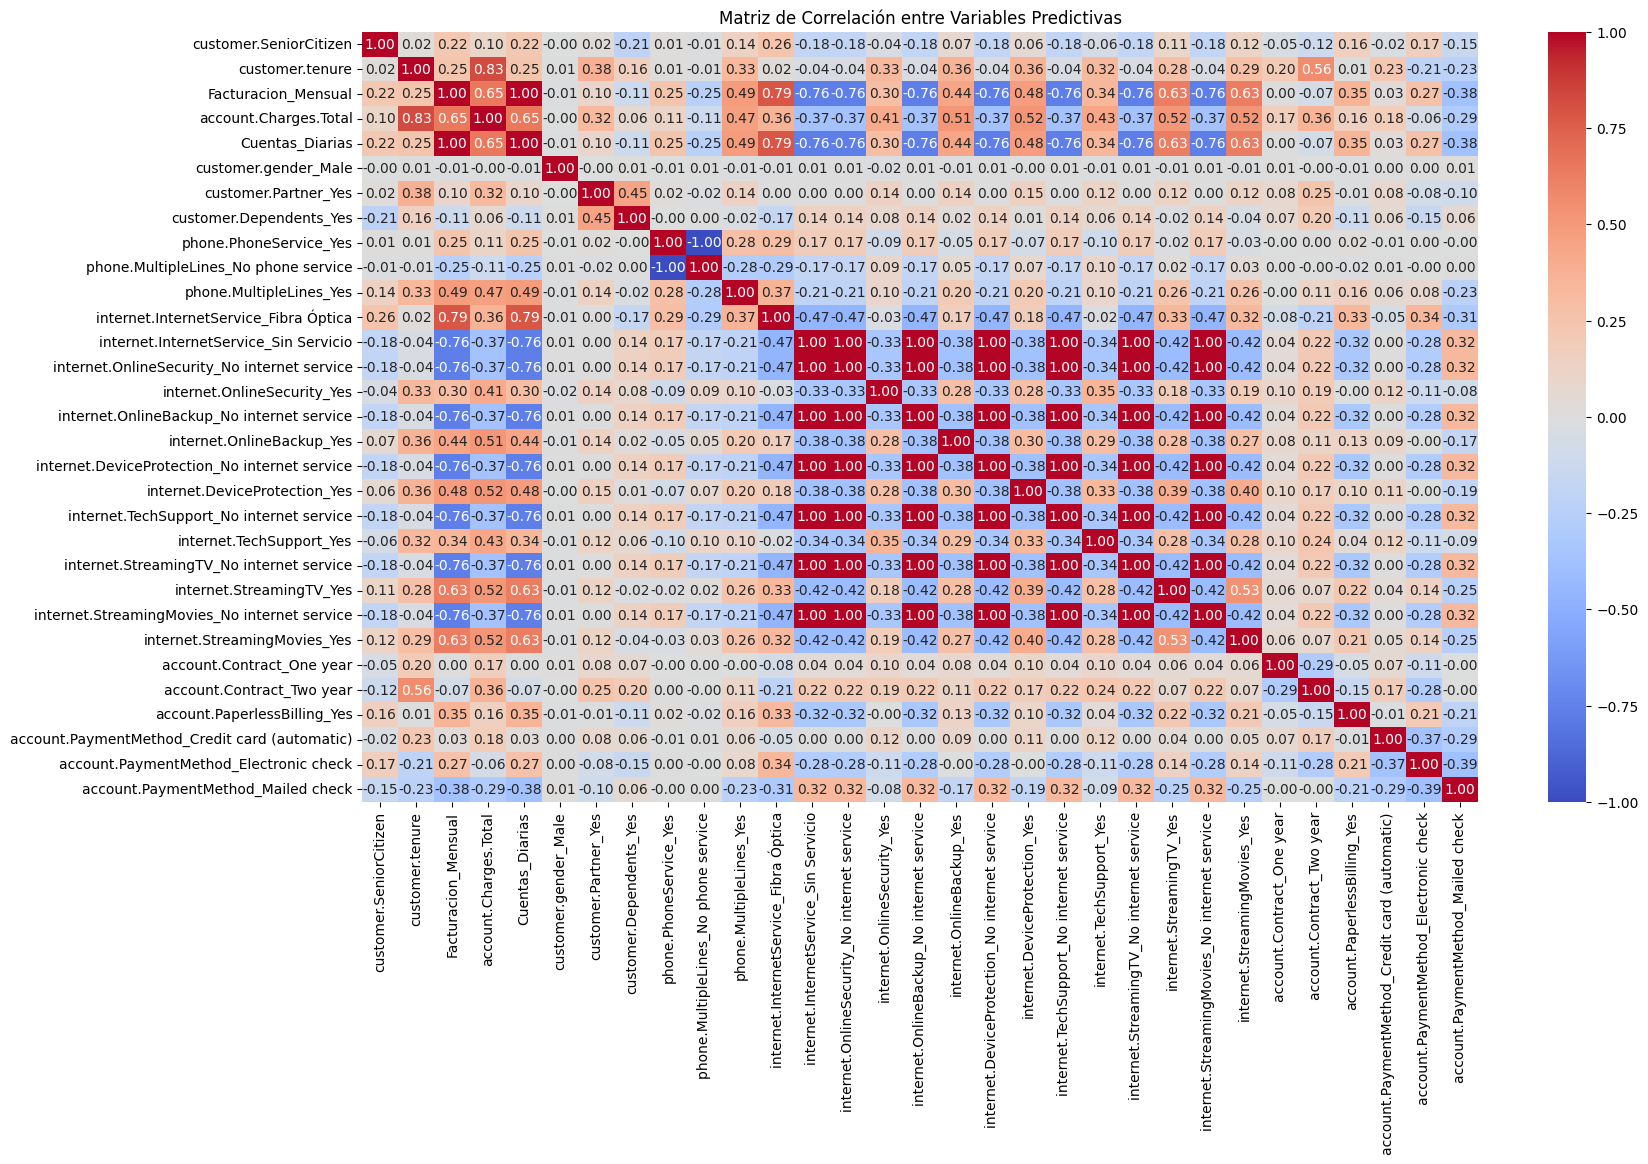

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaci√≥n entre Variables Predictivas")
plt.show()

##### **Comparaci√≥n con otras t√©cnicas de selecci√≥n autom√°tica**

<u>Recursive Feature Elimination (RFE)</u>

In [18]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Variables seleccionadas por RFE:", selected_features.tolist())

Variables seleccionadas por RFE: ['customer.tenure', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'internet.InternetService_Fibra √ìptica']


<u>SelectFromModel</u>

In [19]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model)
sfm.fit(X, y)

selected_features_sfm = X.columns[sfm.get_support()]
print("Variables seleccionadas por SelectFromModel:", selected_features_sfm.tolist())

Variables seleccionadas por SelectFromModel: ['customer.tenure', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'internet.InternetService_Fibra √ìptica']


Etapa 2: An√°lisis de Correlaci√≥n y Selecci√≥n de Variables
En esta etapa se realiz√≥ un an√°lisis exhaustivo para identificar las variables m√°s relevantes en la predicci√≥n de cancelaci√≥n de clientes (Churn). El objetivo fue reducir la dimensionalidad del conjunto de datos, eliminar redundancias y preparar un conjunto robusto de variables predictoras para el modelado.
üîç An√°lisis de Correlaci√≥n
Se aplicaron t√©cnicas de correlaci√≥n cruzada entre variables num√©ricas, lo que permiti√≥ identificar relaciones lineales fuertes entre algunas variables, especialmente aquellas relacionadas con facturaci√≥n y uso diario. Se observ√≥ una alta correlaci√≥n entre:
- Facturacion_Mensual y Cuentas_Diarias
- account.Charges.Total y ambas anteriores
Esto sugiere redundancia informativa que podr√≠a afectar la estabilidad de algunos modelos.
üìà An√°lisis de Multicolinealidad (VIF)
Se calcul√≥ el Factor de Inflaci√≥n de Varianza (VIF) para las principales variables num√©ricas. Los resultados indicaron:
- customer.tenure: VIF moderado (5.77), aceptable
- account.Charges.Total: VIF alto (9.40), requiere monitoreo
- Facturacion_Mensual y Cuentas_Diarias: VIF infinito, indicando multicolinealidad extrema
Este hallazgo refuerza la necesidad de considerar la eliminaci√≥n de una de estas dos variables en etapas posteriores.
üß† T√©cnicas de Selecci√≥n de Variables
Se aplicaron tres enfoques complementarios:
- Importancia de variables con √°rbol de decisi√≥n: permiti√≥ visualizar las 15 variables m√°s influyentes en la predicci√≥n de churn.
- RFE (Recursive Feature Elimination): seleccion√≥ cinco variables clave, priorizando rendimiento predictivo.
- SelectFromModel: coincidi√≥ con RFE, validando la consistencia de la selecci√≥n.
Las variables seleccionadas por ambas t√©cnicas fueron:
['customer.tenure',
 'Facturacion_Mensual',
 'account.Charges.Total',
 'Cuentas_Diarias',
 'internet.InternetService_Fibra √ìptica']

 ‚úÖ Conclusi√≥n de la Etapa
Se consolid√≥ un conjunto de cinco variables altamente relevantes para el modelado, aunque se detect√≥ multicolinealidad entre dos de ellas. Esta situaci√≥n ser√° monitoreada en la siguiente etapa, donde se evaluar√° su impacto en el rendimiento de los modelos. La selecci√≥n fue validada por m√∫ltiples t√©cnicas, lo que aporta solidez al proceso de preparaci√≥n.


### <font color='blue'>**3.- Entrenar dos o m√°s modelos de clasificaci√≥n**.